In [ ]:
!pip install pandas sklearn numpy seaborn matplotlib

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.


Загружаем датасет, импортируем необходимые библиотеки.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 

#data1 = pd.read_csv('/home/ale/venv_jupiter/venv_jupiter/datasets/application_record.csv')
#data2 = pd.read_csv('/home/ale/venv_jupiter/venv_jupiter/datasets/credit_record.csv')
#data1


from google.colab import drive
drive.mount('/content/drive')

data1 = pd.read_csv('/content/drive/My Drive/Colab/datasets/application_record.csv', sep=',')
data2 = pd.read_csv('/content/drive/My Drive/Colab/datasets/credit_record.csv', sep=',')
data1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [2]:
data2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


Подготовка данных:
*   Замена значений в колонках NAME_INCOME_TYPE,	NAME_EDUCATION_TYPE,	NAME_FAMILY_STATUS,	NAME_HOUSING_TYPE, OCCUPATION_TYPE на частоту встречаемости в колонке;
*   Label-encode на колонку CODE_GENDER,	FLAG_OWN_CAR,	FLAG_OWN_REALTY;
*   Удаление колонки FLAG_MOBIL;


In [3]:
data_all = data2.merge(data1, how='inner',left_on='ID', right_on='ID',)
data_all

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5,5008804,-5,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
6,5008804,-6,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
7,5008804,-7,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
8,5008804,-8,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
9,5008804,-9,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
ID                     777715 non-null int64
MONTHS_BALANCE         777715 non-null int64
STATUS                 777715 non-null object
CODE_GENDER            777715 non-null object
FLAG_OWN_CAR           777715 non-null object
FLAG_OWN_REALTY        777715 non-null object
CNT_CHILDREN           777715 non-null int64
AMT_INCOME_TOTAL       777715 non-null float64
NAME_INCOME_TYPE       777715 non-null object
NAME_EDUCATION_TYPE    777715 non-null object
NAME_FAMILY_STATUS     777715 non-null object
NAME_HOUSING_TYPE      777715 non-null object
DAYS_BIRTH             777715 non-null int64
DAYS_EMPLOYED          777715 non-null int64
FLAG_MOBIL             777715 non-null int64
FLAG_WORK_PHONE        777715 non-null int64
FLAG_PHONE             777715 non-null int64
FLAG_EMAIL             777715 non-null int64
OCCUPATION_TYPE        537667 non-null object
CNT_FAM_MEMBERS        

In [5]:
data_all.isna().any()

ID                     False
MONTHS_BALANCE         False
STATUS                 False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [6]:
data_all['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [7]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
ID                     777715 non-null int64
MONTHS_BALANCE         777715 non-null int64
STATUS                 777715 non-null object
CODE_GENDER            777715 non-null object
FLAG_OWN_CAR           777715 non-null object
FLAG_OWN_REALTY        777715 non-null object
CNT_CHILDREN           777715 non-null int64
AMT_INCOME_TOTAL       777715 non-null float64
NAME_INCOME_TYPE       777715 non-null object
NAME_EDUCATION_TYPE    777715 non-null object
NAME_FAMILY_STATUS     777715 non-null object
NAME_HOUSING_TYPE      777715 non-null object
DAYS_BIRTH             777715 non-null int64
DAYS_EMPLOYED          777715 non-null int64
FLAG_MOBIL             777715 non-null int64
FLAG_WORK_PHONE        777715 non-null int64
FLAG_PHONE             777715 non-null int64
FLAG_EMAIL             777715 non-null int64
OCCUPATION_TYPE        537667 non-null object
CNT_FAM_MEMBERS        

In [8]:
data_all = data_all.sample(80000)
data_all.dropna(inplace=True)
data_all.reset_index(drop=True, inplace=True)
data_all

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5125987,-7,C,M,N,N,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12546,-2539,1,0,0,0,Low-skill Laborers,3.0
1,5048191,-42,C,M,Y,Y,0,247500.0,State servant,Higher education,Single / not married,House / apartment,-10012,-826,1,1,1,0,High skill tech staff,1.0
2,5085963,-1,C,F,N,Y,0,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-18913,-807,1,0,0,0,Laborers,1.0
3,5023677,-17,C,F,Y,Y,0,117000.0,Working,Secondary / secondary special,Married,House / apartment,-11736,-1816,1,0,0,0,Cooking staff,2.0
4,5139308,-22,C,M,Y,Y,0,180000.0,State servant,Higher education,Married,House / apartment,-10091,-643,1,0,0,0,High skill tech staff,2.0
5,5105173,-10,C,M,N,Y,2,450000.0,Commercial associate,Higher education,Married,House / apartment,-12238,-2187,1,1,1,0,Managers,4.0
6,5142361,-5,5,M,Y,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-16204,-925,1,1,1,0,Drivers,3.0
7,5132718,-36,0,F,N,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-24449,-3056,1,0,1,0,Medicine staff,2.0
8,5089547,-4,0,F,N,N,1,135000.0,Working,Higher education,Separated,House / apartment,-13108,-2043,1,0,1,0,Core staff,2.0
9,5143452,-1,C,M,Y,Y,0,247500.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,-11912,-1749,1,0,0,0,High skill tech staff,2.0


In [9]:
from collections import Counter
def get_count(count):
    return counter.get(count,np.nan)
l = ['OCCUPATION_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_INCOME_TYPE']
for i in l:
    counter = Counter(data_all[i])
    data_all.loc[:, i] = data_all[i].apply(get_count)

data_all.head(10)

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5125987,-7,C,M,N,N,1,135000.0,34134,36892,39481,48803,-12546,-2539,1,0,0,0,402,3.0
1,5048191,-42,C,M,Y,Y,0,247500.0,5445,15784,6795,48803,-10012,-826,1,1,1,0,3301,1.0
2,5085963,-1,C,F,N,Y,0,180000.0,34134,36892,6795,48803,-18913,-807,1,0,0,0,13688,1.0
3,5023677,-17,C,F,Y,Y,0,117000.0,34134,36892,39481,48803,-11736,-1816,1,0,0,0,1343,2.0
4,5139308,-22,C,M,Y,Y,0,180000.0,5445,15784,39481,48803,-10091,-643,1,0,0,0,3301,2.0
5,5105173,-10,C,M,N,Y,2,450000.0,15645,15784,39481,48803,-12238,-2187,1,1,1,0,6989,4.0
6,5142361,-5,5,M,Y,Y,1,112500.0,34134,36892,39481,48803,-16204,-925,1,1,1,0,4965,3.0
7,5132718,-36,0,F,N,Y,0,135000.0,34134,36892,39481,48803,-24449,-3056,1,0,1,0,2713,2.0
8,5089547,-4,0,F,N,N,1,135000.0,34134,15784,3234,48803,-13108,-2043,1,0,1,0,7849,2.0
9,5143452,-1,C,M,Y,Y,0,247500.0,5445,36892,4552,48803,-11912,-1749,1,0,0,0,3301,2.0


In [10]:
data_all = pd.get_dummies(data_all, columns=['STATUS'])
data_all = data_all.drop(columns=['STATUS_0','STATUS_1',	'STATUS_2',	'STATUS_3',	'STATUS_4',	'STATUS_5',	'STATUS_X'])

le = sklearn.preprocessing.LabelEncoder()
data_all['FLAG_OWN_REALTY'] = le.fit_transform(data_all['FLAG_OWN_REALTY'])
data_all['CODE_GENDER'] = le.fit_transform(data_all['CODE_GENDER'])
data_all['FLAG_OWN_CAR'] = le.fit_transform(data_all['FLAG_OWN_CAR'])
#data_all['OCCUPATION_TYPE'].fillna(data_all.groupby('ID')['OCCUPATION_TYPE'].transform('mean'), inplace=True)


data_all.head(10)

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_C
0,5125987,-7,1,0,0,1,135000.0,34134,36892,39481,48803,-12546,-2539,1,0,0,0,402,3.0,1
1,5048191,-42,1,1,1,0,247500.0,5445,15784,6795,48803,-10012,-826,1,1,1,0,3301,1.0,1
2,5085963,-1,0,0,1,0,180000.0,34134,36892,6795,48803,-18913,-807,1,0,0,0,13688,1.0,1
3,5023677,-17,0,1,1,0,117000.0,34134,36892,39481,48803,-11736,-1816,1,0,0,0,1343,2.0,1
4,5139308,-22,1,1,1,0,180000.0,5445,15784,39481,48803,-10091,-643,1,0,0,0,3301,2.0,1
5,5105173,-10,1,0,1,2,450000.0,15645,15784,39481,48803,-12238,-2187,1,1,1,0,6989,4.0,1
6,5142361,-5,1,1,1,1,112500.0,34134,36892,39481,48803,-16204,-925,1,1,1,0,4965,3.0,0
7,5132718,-36,0,0,1,0,135000.0,34134,36892,39481,48803,-24449,-3056,1,0,1,0,2713,2.0,0
8,5089547,-4,0,0,0,1,135000.0,34134,15784,3234,48803,-13108,-2043,1,0,1,0,7849,2.0,0
9,5143452,-1,1,1,1,0,247500.0,5445,36892,4552,48803,-11912,-1749,1,0,0,0,3301,2.0,1


In [11]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55304 entries, 0 to 55303
Data columns (total 20 columns):
ID                     55304 non-null int64
MONTHS_BALANCE         55304 non-null int64
CODE_GENDER            55304 non-null int64
FLAG_OWN_CAR           55304 non-null int64
FLAG_OWN_REALTY        55304 non-null int64
CNT_CHILDREN           55304 non-null int64
AMT_INCOME_TOTAL       55304 non-null float64
NAME_INCOME_TYPE       55304 non-null int64
NAME_EDUCATION_TYPE    55304 non-null int64
NAME_FAMILY_STATUS     55304 non-null int64
NAME_HOUSING_TYPE      55304 non-null int64
DAYS_BIRTH             55304 non-null int64
DAYS_EMPLOYED          55304 non-null int64
FLAG_MOBIL             55304 non-null int64
FLAG_WORK_PHONE        55304 non-null int64
FLAG_PHONE             55304 non-null int64
FLAG_EMAIL             55304 non-null int64
OCCUPATION_TYPE        55304 non-null int64
CNT_FAM_MEMBERS        55304 non-null float64
STATUS_C               55304 non-null uint8
dtypes:

In [12]:
values = data_all['STATUS_C'].value_counts().reset_index()
values


,index,STATUS_C
0,0,31837
1,1,23467


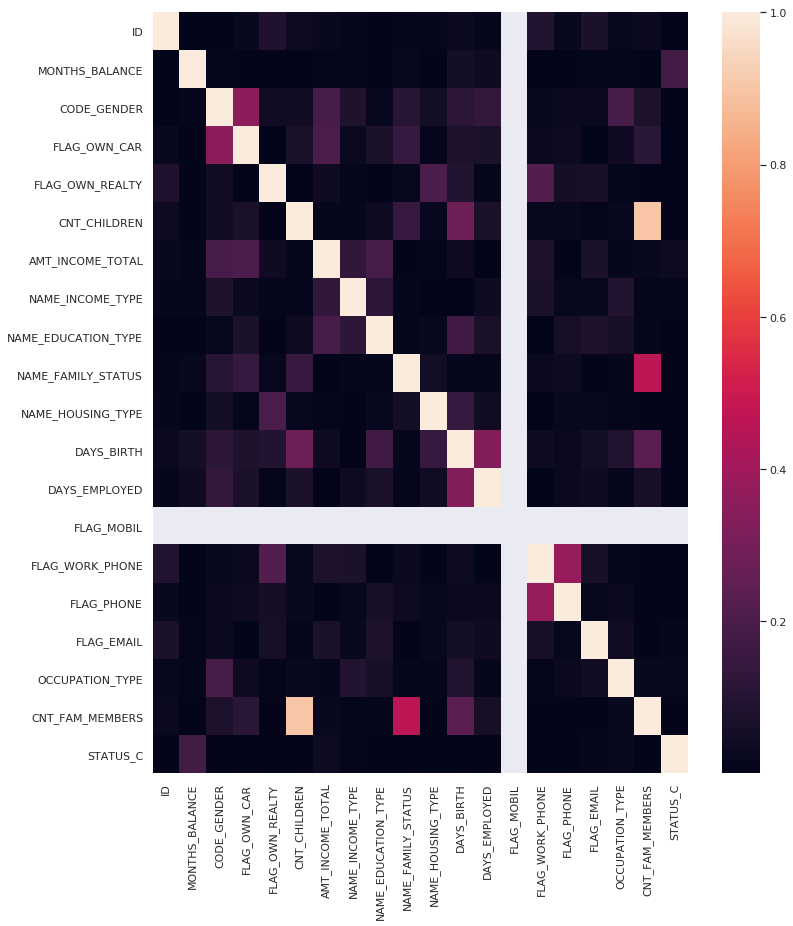

In [13]:
import seaborn as sns


corr = data_all.corr().abs()

sns.set(rc={'figure.figsize':(12, 14)})

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [14]:
data_all = data_all.drop(['FLAG_MOBIL','ID','FLAG_WORK_PHONE',	'FLAG_PHONE',	'FLAG_EMAIL'], axis='columns')

Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую.

In [15]:
X = data_all[data_all.columns[:-1]]
y = data_all['STATUS_C']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
y.value_counts()

0    31837
1    23467
Name: STATUS_C, dtype: int64

In [17]:
%%time
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=3)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
# Есть и другие метрики качества - о них будет рассказано на следующей лабе
print(clf.score(X_test, y_test))

0.70656733690149
CPU times: user 1.79 s, sys: 3.81 ms, total: 1.79 s
Wall time: 1.83 s


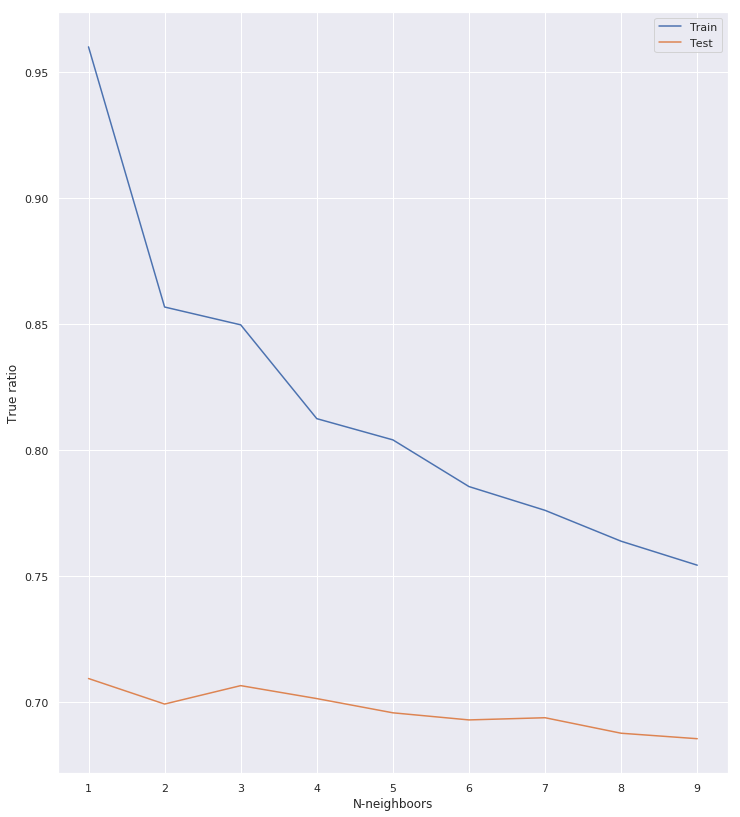

In [19]:
import matplotlib.pyplot as plt
# Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
# значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.
train_scores = {}
test_scores = {}

# для n в диапазоне от 1 до 10 включительно
for n in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # значение качества на текущей итерации:
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    # запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# нарисуем графики

plt.plot(train_scores.keys(), train_scores.values(), label='Train')
plt.plot(test_scores.keys(), test_scores.values(), label='Test')
plt.xlabel('N-neighboors')
plt.ylabel('True ratio')
plt.legend()
plt.show()

In [ ]:
data_all = pd.DataFrame(data_all)
#data_all.to_csv('/home/ale/venv_jupiter/venv_jupiter/datasets/application_record_final.csv', index=False, encoding='utf-8')
data_all.to_csv('/content/drive/My Drive/Colab/datasets/application_record_final.csv', index=False, encoding='utf-8')